<a href="https://colab.research.google.com/github/jjgallonc/Analitica/blob/main/Reto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
0. Cargar librerías y drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

#Para no tener que cargar nuevamente el archivo
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
1. Cargar archivos - análisis a priori

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlación:
              Age    Income     Hours    Enroll
Age     1.000000  0.450562 -0.040133  0.644033
Income  0.450562  1.000000 -0.018196  0.476372
Hours  -0.040133 -0.018196  1.000000 -0.048184
Enroll  0.644033  0.476372 -0.048184  1.000000


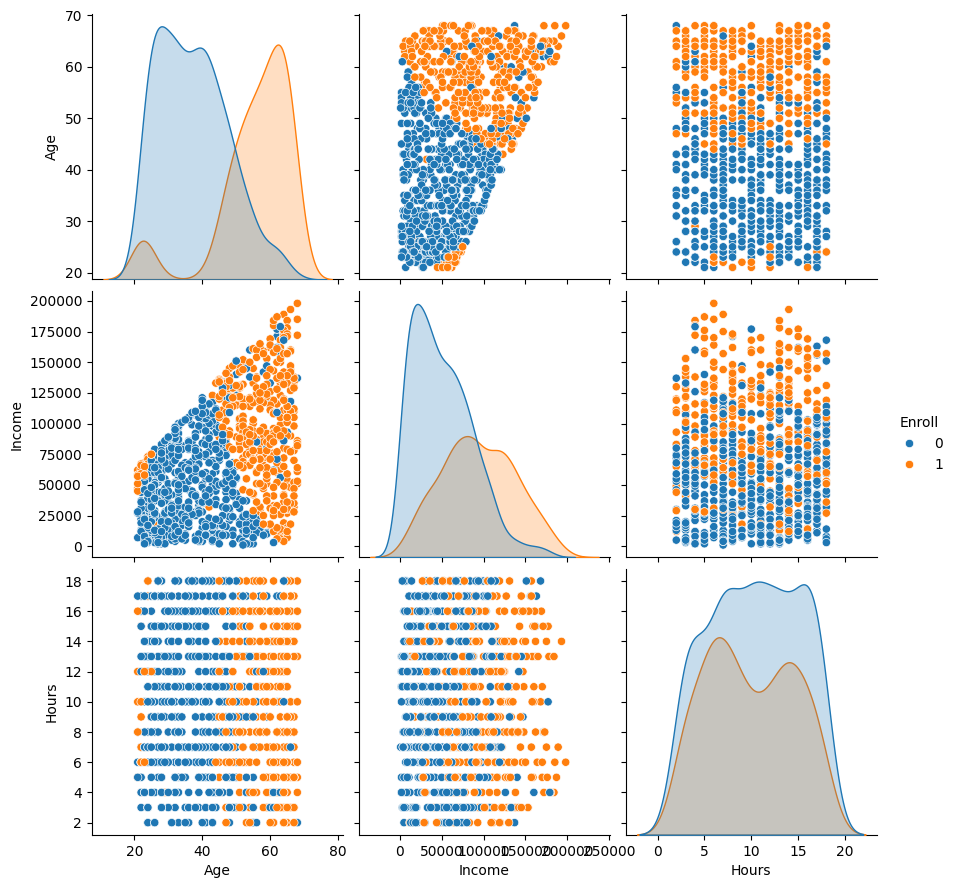

In [ ]:
nxl='/content/drive/MyDrive/Analitica de Negocios/GymData.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()  #Elimina celdas vacías
XDB.head(100)

XDB=XDB[['Age','Income','Hours','Enroll']]
sns.pairplot(XDB, hue='Enroll', size=3,vars=['Age','Income','Hours'])

#Para confirmar la correlación
corr=XDB.corr()
print("Esta es la matriz de correlación:\n",corr)

XD=np.array(XDB.iloc[:,0:3])
YD=np.array(XDB.iloc[:,3])

2. Implementar el modelo KNN

Esta es la matriz de confusión:
 [[538  59]
 [145 258]]
Exactitud: 0.796
Sensibilidad: 0.6401985111662531
Especificidad: 0.9011725293132329
Me inscribo:
 [0]


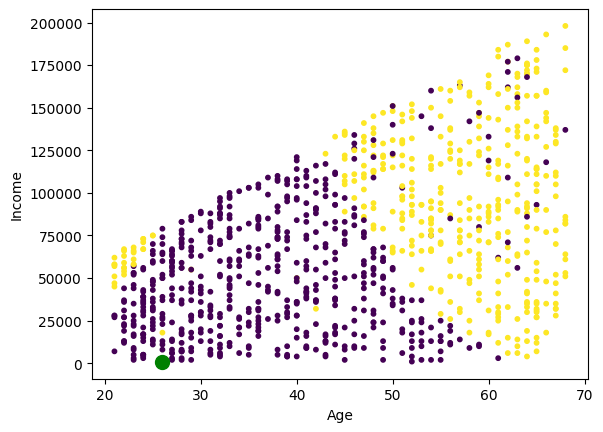

In [ ]:
from os import EX_CANTCREAT
mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,YD)

ydp=mknn.predict(XD)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(YD,ydp)
print("Esta es la matriz de confusión:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
print("Exactitud:",Exactitud)
print("Sensibilidad:",Sensibilidad)
print("Especificidad:",Especificidad)

XDP=np.array([[26,800,15]])
ydpp=mknn.predict(XDP)
print("Me inscribo:\n",ydpp)

plt.scatter(XD[:,0],XD[:,1],c=YD,s=10,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=100,facecolors='green')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

3. K-means

Donde quedó la primera persona: 3
Donde quedó la segunda persona: 3
Donde quedó la tercera persona: 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


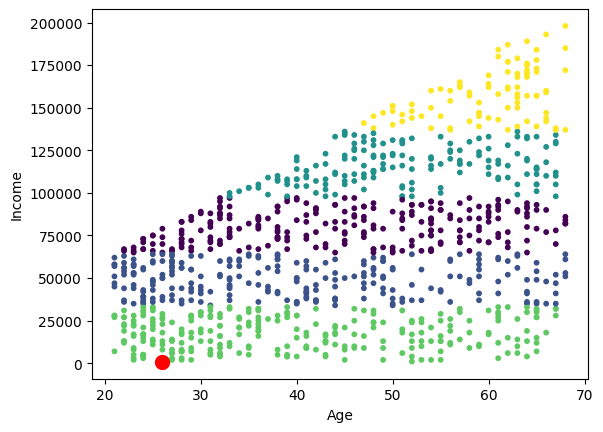

Me inscribo:
 [3]
El porcentaje de no inscritos para el cluster 0 es: 0.5284552845528455
El porcentaje de inscritos para el cluster 0 es: 0.4715447154471545
El porcentaje de no inscritos para el cluster 1 es: 0.7226890756302521
El porcentaje de inscritos para el cluster 1 es: 0.2773109243697479
El porcentaje de no inscritos para el cluster 2 es: 0.3184713375796178
El porcentaje de inscritos para el cluster 2 es: 0.6815286624203821
El porcentaje de no inscritos para el cluster 3 es: 0.8487084870848709
El porcentaje de inscritos para el cluster 3 es: 0.15129151291512916
El porcentaje de no inscritos para el cluster 4 es: 0.17045454545454544
El porcentaje de inscritos para el cluster 4 es: 0.8295454545454546
Características sociodemográficas de cada cluster: [[    44.85772358  80146.34146341     10.33333333]
 [    39.74789916  49365.54621849     10.28151261]
 [    51.2611465  115770.70063694      9.8089172 ]
 [    39.6900369   17760.14760148     10.18819188]
 [    60.03409091 157795.45454

In [ ]:
np.random.seed(42)

mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,YD)
labels=mkm.labels_
print('Donde quedó la primera persona:',labels[0,])
print('Donde quedó la segunda persona:',labels[1,])
print('Donde quedó la tercera persona:',labels[2,])

plt.scatter(XD[:,0],XD[:,1],c=labels,s=10,cmap='viridis')
plt.scatter(XDP[:,0],XDP[:,1],marker='o',s=100,facecolors='red')
plt.xlabel('Age');plt.ylabel('Income')
plt.show()

XDP=np.array([[26,800,15]])
ydpp2=mkm.predict(XDP)
print("Me inscribo:\n",ydpp2)

c00=len(np.where((labels==0)&(YD==0))[0])
c01=len(np.where((labels==0)&(YD==1))[0])
print('El porcentaje de no inscritos para el cluster 0 es:',(c00/(c00+c01)))
print('El porcentaje de inscritos para el cluster 0 es:',(c01/(c00+c01)))
c10=len(np.where((labels==1)&(YD==0))[0])
c11=len(np.where((labels==1)&(YD==1))[0])
print('El porcentaje de no inscritos para el cluster 1 es:',(c10/(c10+c11)))
print('El porcentaje de inscritos para el cluster 1 es:',(c11/(c10+c11)))
c20=len(np.where((labels==2)&(YD==0))[0])
c21=len(np.where((labels==2)&(YD==1))[0])
print('El porcentaje de no inscritos para el cluster 2 es:',(c20/(c20+c21)))
print('El porcentaje de inscritos para el cluster 2 es:',(c21/(c20+c21)))
c30=len(np.where((labels==3)&(YD==0))[0])
c31=len(np.where((labels==3)&(YD==1))[0])
print('El porcentaje de no inscritos para el cluster 3 es:',(c30/(c30+c31)))
print('El porcentaje de inscritos para el cluster 3 es:',(c31/(c30+c31)))
c40=len(np.where((labels==4)&(YD==0))[0])
c41=len(np.where((labels==4)&(YD==1))[0])
print('El porcentaje de no inscritos para el cluster 4 es:',(c40/(c40+c41)))
print('El porcentaje de inscritos para el cluster 4 es:',(c41/(c40+c41)))


np.set_printoptions(suppress=True)
clusters=mkm.cluster_centers_
print('Características sociodemográficas de cada cluster:',clusters)

In [ ]:
cluster_counts = np.bincount(labels)

max_age_cluster = np.argmax(clusters[:, 0])
max_income_cluster = np.argmax(clusters[:, 1])
max_hours_cluster = np.argmax(clusters[:, 2])

for i, count in enumerate(cluster_counts):
  print(f"Clúster {i}: {count} individuos")

print(f"Clúster con mayor edad: {max_age_cluster}")
print(f"Clúster con mayores ingresos: {max_income_cluster}")
print(f"Clúster con mayor número de horas en el gimnasio: {max_hours_cluster}")

Clúster 0: 246 individuos
Clúster 1: 238 individuos
Clúster 2: 157 individuos
Clúster 3: 271 individuos
Clúster 4: 88 individuos
Clúster con mayor edad: 4
Clúster con mayores ingresos: 4
Clúster con mayor número de horas en el gimnasio: 0


El análisis de los modelos KNN y K-Means parte de las variables de entrada "Edad", "Ingreso" y "Horas", con las que se busca predecir o determinar la inscripción de una persona al Fitness Center, siendo "Inscripción" la variable objetivo. La mayor correlación se encontró entre "Edad" e "Inscripción", con un coeficiente de 0.644, lo que indica una correlación moderada pero no notablemente fuerte. En cuanto al comportamiento del modelo KNN, la exactitud alcanzada fue de 79.6%, lo que indica que predijo correctamente la mayoría de los casos. La sensibilidad de 64% muestra que el modelo tiene margen de mejora al identificar correctamente los casos positivos, mientras que la especificidad del 90.1% refleja una mayor capacidad para detectar los casos negativos. Al predecir la inscripción de una persona de 26 años con un ingreso de 800 y 15 horas de asistencia al gimnasio, el modelo KNN indica que esta persona no se inscribiría, mientras que el modelo K-Means la clasifica en el clúster 3, donde solo alrededor del 15% de los individuos se inscriben. Finalmente, en términos de membresías por clúster, el clúster 3 tiene el mayor número de individuos (271), mientras que el clúster 4 presenta las mayores edades y mayores ingresos, y el clúster 0 incluye a los individuos que pasan más horas en el gimnasio.